In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [3]:
# https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
df = pd.read_csv("./Crime_Data_from_2020_to_Present.csv")
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
df.shape

(834320, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834320 entries, 0 to 834319
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           834320 non-null  int64  
 1   Date Rptd       834320 non-null  object 
 2   DATE OCC        834320 non-null  object 
 3   TIME OCC        834320 non-null  int64  
 4   AREA            834320 non-null  int64  
 5   AREA NAME       834320 non-null  object 
 6   Rpt Dist No     834320 non-null  int64  
 7   Part 1-2        834320 non-null  int64  
 8   Crm Cd          834320 non-null  int64  
 9   Crm Cd Desc     834320 non-null  object 
 10  Mocodes         718744 non-null  object 
 11  Vict Age        834320 non-null  int64  
 12  Vict Sex        724432 non-null  object 
 13  Vict Descent    724424 non-null  object 
 14  Premis Cd       834310 non-null  float64
 15  Premis Desc     833821 non-null  object 
 16  Weapon Used Cd  290925 non-null  float64
 17  Weapon Des

In [7]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,8.343200e+05,834320.000000,834320.000000,834320.000000,834320.000000,834320.000000,834320.000000,834310.000000,290925.000000,834310.000000,61325.000000,2071.000000,61.000000,834320.000000,834320.000000
mean,2.163756e+08,1335.953179,10.708680,1117.292147,1.413470,500.844621,29.782026,305.839397,363.065742,500.582878,957.498997,983.795751,990.868852,33.981070,-118.032961
std,1.090810e+07,653.964917,6.094713,609.462937,0.492456,207.778540,21.782950,216.806584,123.716983,207.565871,111.393187,52.531254,27.690236,1.775627,6.156465
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.102104e+08,900.000000,6.000000,615.000000,1.000000,331.000000,6.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.013700,-118.429500
50%,2.201268e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058400,-118.321400
75%,2.220196e+08,1900.000000,16.000000,1615.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163000,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [8]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           115576
Vict Age               0
Vict Sex          109888
Vict Descent      109896
Premis Cd             10
Premis Desc          499
Weapon Used Cd    543395
Weapon Desc       543395
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          772995
Crm Cd 3          832249
Crm Cd 4          834259
LOCATION               0
Cross Street      701184
LAT                    0
LON                    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
sex_count = df.groupby("Vict Sex").size().reset_index(name="Total Count")
sex_count

,Vict Sex,Total Count
0,-,1
1,F,307149
2,H,91
3,M,344140
4,X,73051


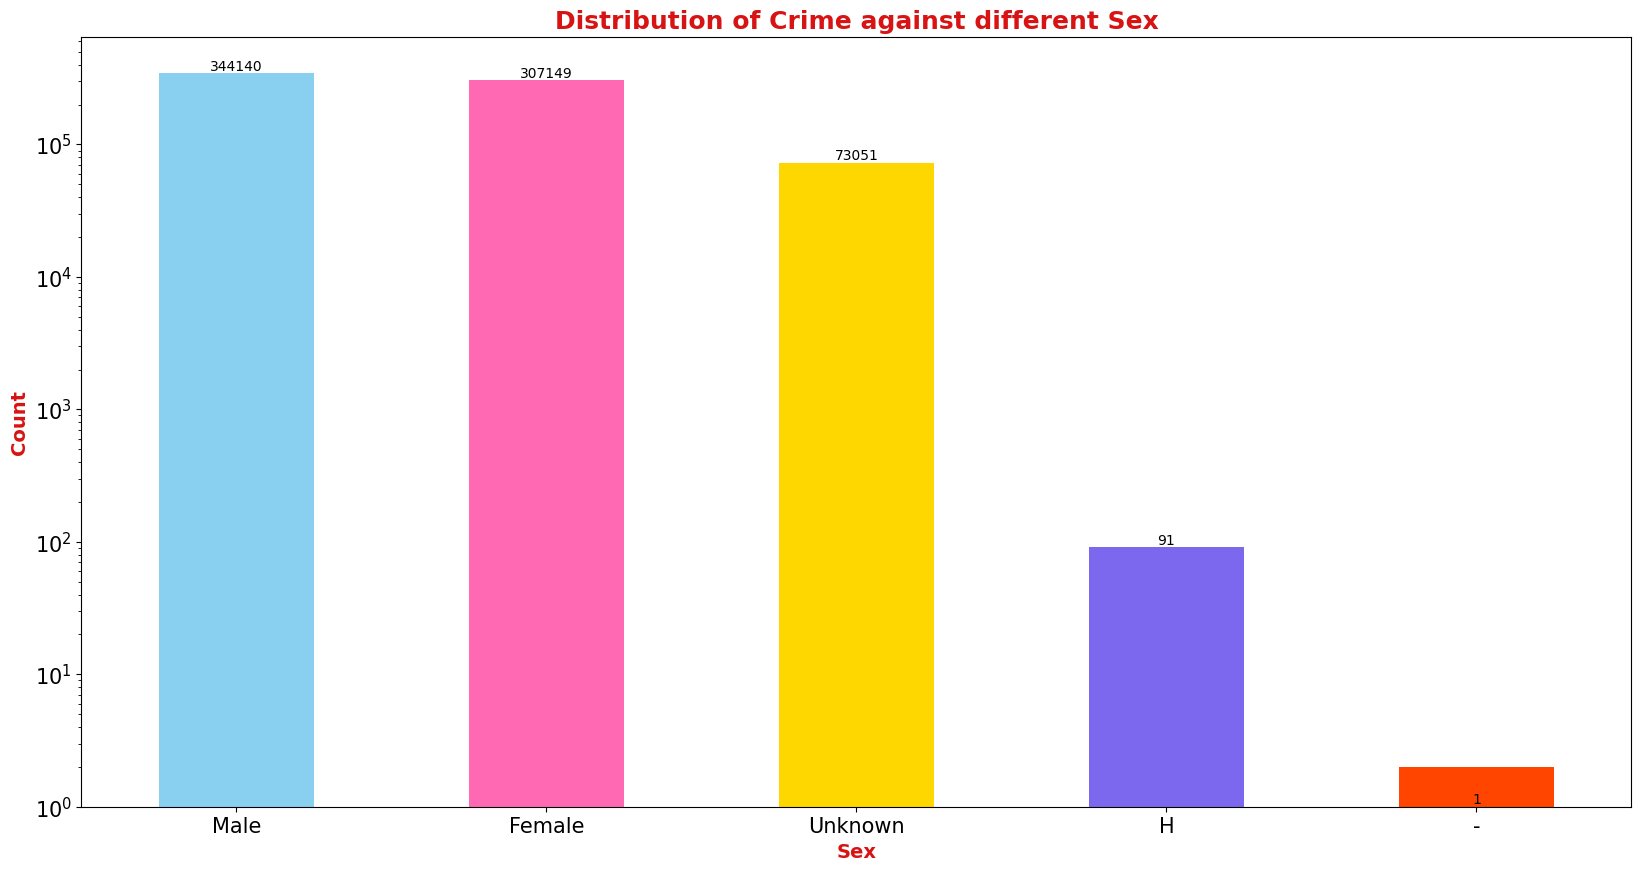

In [16]:
plt.figure(figsize=(20,10))

ax = df["Vict Sex"].value_counts().plot(kind="bar",color=colors,rot=0,log=True)
ax.set_xticklabels(["Male","Female","Unknown","H","-"])

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()),ha="center",va="bottom",color="black")
    ax.tick_params(axis="both",labelsize=15)

plt.xlabel("Sex",weight="bold",fontsize=14,color="#D71313")
plt.ylabel("Count",weight="bold",fontsize=14,color="#D71313")
plt.title("Distribution of Crime against different Sex",weight="bold",color="#D71313",fontsize=18)

plt.show()

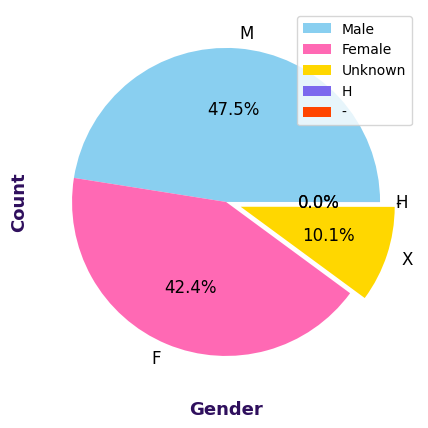

In [41]:
plt.figure(figsize=(10,5))

counts = df["Vict Sex"].value_counts()
explode = (0,0,0.1,0,0)

counts.plot(kind="pie",colors=colors,fontsize=12,explode=explode,autopct="%1.1f%%")
plt.xlabel("Gender",fontsize=13,weight="bold",color="#2F0F5D")
plt.ylabel("Count",fontsize=13,weight="bold",color="#2F0F5D")
plt.legend(labels=["Male","Female","Unknown","H","-"],loc="best")

plt.show()

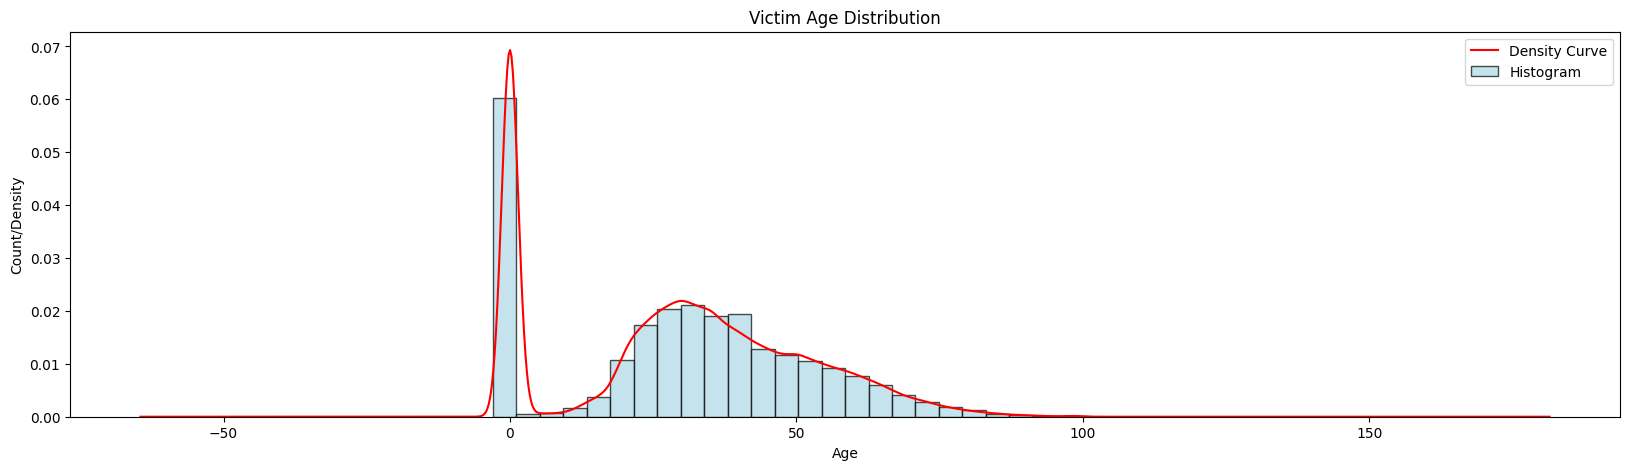

In [44]:
fig, ax = plt.subplots(figsize=(20,5))

ax.hist(df["Vict Age"],bins=30,edgecolor="black",alpha=0.7,color="lightblue",density=True)
df["Vict Age"].plot(kind="kde",color="red",ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Count/Density")
ax.set_title("Victim Age Distribution")
ax.legend(["Density Curve","Histogram"])

plt.show()

In [45]:
df["Status"].value_counts()

Status
IC    667644
AO     89864
AA     72652
JA      2710
JO      1446
CC         4
Name: count, dtype: int64

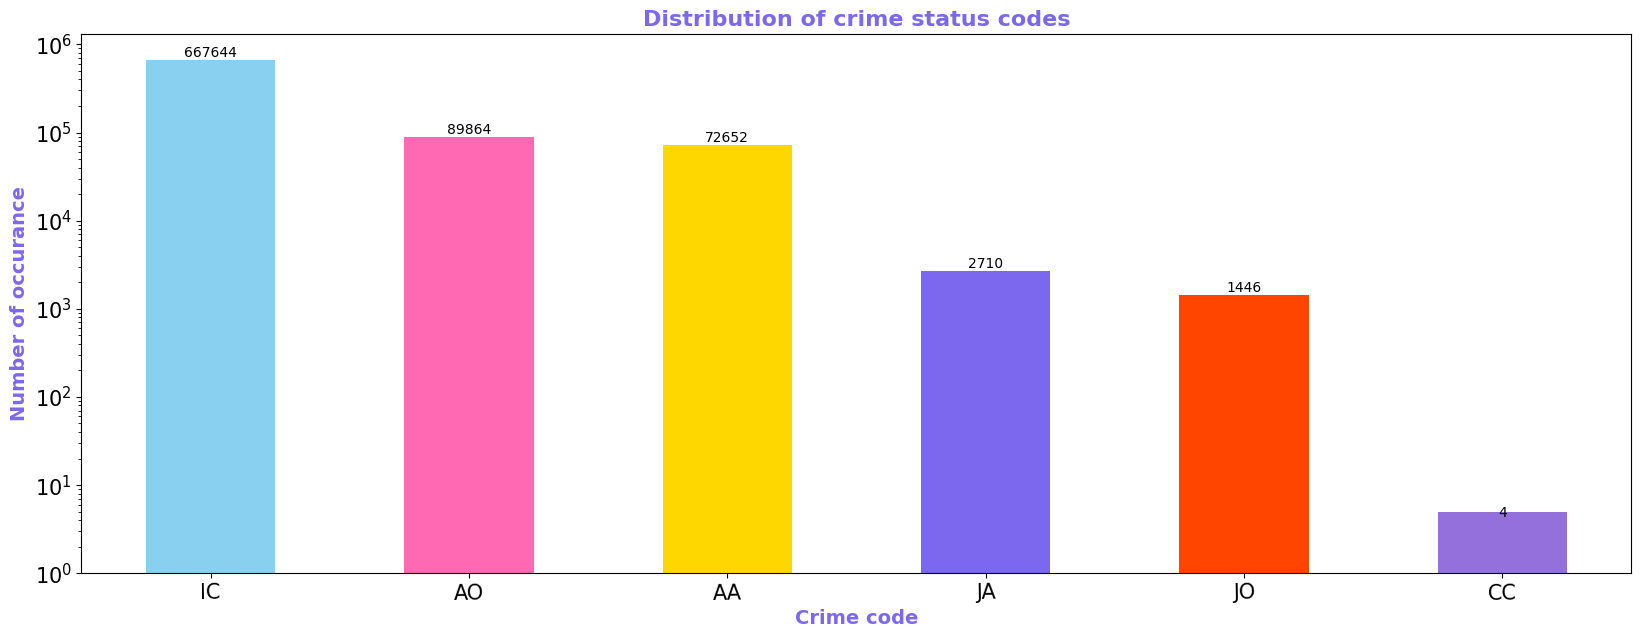

In [53]:
plt.figure(figsize=(20,7))

ax = df["Status"].value_counts().plot(kind="bar",color=colors,rot=True,log=True)
ax.set_xticklabels(("IC","AO","AA","JA","JO","CC"))

for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()),ha="center",va="bottom",color="black")
    ax.tick_params(axis="both",labelsize=15)

plt.xlabel("Crime code",weight="bold",color=colors[3],fontsize=14)
plt.ylabel("Number of occurance",weight="bold",color=colors[3],fontsize=14)
plt.title("Distribution of crime status codes",weight="bold",color=colors[3],fontsize=16)
plt.show()